In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils


plt.rcParams['figure.figsize'] = [8, 6]
sns.set_theme(style="ticks", color_codes=True)
df = pd.read_csv('volby.csv', low_memory=False)
df = utils.rename_cols(df)

# Elections dataset report
## Initial information
### Objective
Estimate voter turnout per town, see whether it will be above/below region average

### Data
Contains information about voter attendance per town in the 2013 and 2017 elections. Contains votes per party and demographic data for each voting district.

Demographic data will be worthwhile to investigate, to see whether it correlates to voter turnout. Votes per party may also be a factor. Explore if voters of certain parties are more likely to attend and therefore towns leaning towards those parties are more likely to have higher attendance.

### Goal
Estimate voter attendance per town


## Data exploration
### Voter count and voter attendance
The country seems to be split up into voting districts that are mostly up to 1000 voters. Using the attendance data, we will explore other data points and evaluate the correlation.

In [55]:
attendances = ['attendance_13', 'attendance_17']
educ_levels_cols = [
    'Vzd_zakl_A', 'Vzd_str_be_A', 'Vzd_str_sm_A',
    'Vzd_nast_A', 'Vzd_vos_A', 'Vzd_vysok_A'
]
empl_states_cols = [
    'Eko_zam_A', 'Eko_post_p_A',
    'Eko_nezam_A', 'Nepracduch_A',
]
misc_cols =  [
    'Muzi_A', 'Zeny_A', 'Rodst_rozv_A',
    'Nar_romska_A', 'Nab_rimsko_A',
]
demographics_cols = educ_levels_cols + empl_states_cols + misc_cols

In [56]:
desc = df.describe().swapaxes(0, 1)
items = df.shape[0]
desc[desc['count']< items]

,count,mean,std,min,25%,50%,75%,max
Obec_okrsek_final2016,13660.0,1.629125e+07,2.058844e+07,5.000111e+06,5.492582e+06,5.709312e+06,5.969736e+06,5.998081e+07
PAR_2017_1_ODS,14745.0,3.871278e+01,3.624411e+01,0.000000e+00,1.000000e+01,2.900000e+01,5.700000e+01,4.310000e+02
PAR_2017_2,14745.0,5.911835e-01,1.254770e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01
PAR_2017_3,14745.0,2.544591e-01,6.260785e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
PAR_2017_4_CSSD,14745.0,2.493204e+01,1.874933e+01,0.000000e+00,9.000000e+00,2.200000e+01,3.700000e+01,2.250000e+02
...,...,...,...,...,...,...,...,...
Nab_rimsko_A,14759.0,1.157348e+01,1.016100e+01,0.000000e+00,4.672897e+00,8.344924e+00,1.491525e+01,7.837838e+01
Eko_zam_A,14759.0,4.300815e+01,5.753903e+00,0.000000e+00,3.989899e+01,4.334239e+01,4.650192e+01,6.261607e+01
Eko_post_p_A,14759.0,5.896289e+00,2.248385e+00,0.000000e+00,4.357980e+00,5.649718e+00,7.174640e+00,2.631579e+01
Eko_nezam_A,14759.0,4.852644e+00,2.236066e+00,0.000000e+00,3.415779e+00,4.485981e+00,5.882353e+00,3.617907e+01


In [57]:
cols_to_delete = [  # These cols hold no information
    'PAR_2017_CHYBA',
    'PAR_2017_OPRAVA',
    'CHYBA_KRAJ16',
    'PAR_2017_TYP_FORM',
    'Poc_budov'
]
df = df.drop(columns=cols_to_delete)

###Missing values
The dataset contains 14745 rows. Ignoring the columns that have been dropped, there are the following issues:

The following 5 rows appear largely incomplete and useless. Due to their low number, they can be safely dropped.

In [58]:
df[df['Muzi'].isna()]

,ID_N,OBEC,Nazev_obce,Okres_nazev,Kraj_nazev,Obec_okrsek_final2016,OBEC_Okrsek,PAR_2017_1_ODS,PAR_2017_2,PAR_2017_3,...,Vzd_vos_A,Vzd_nast_A,Vzd_str_sm_A,Vzd_str_be_A,Vzd_zakl_A,Nab_rimsko_A,Eko_zam_A,Eko_post_p_A,Eko_nezam_A,Nepracduch_A
1773,1774,539911,Příbram,Příbram,Středočeský kraj,53991139.0,539911_39,62.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,2102,536032,Strýčice,České Budějovice,Jihočeský kraj,5360321.0,536032_1,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3234,3235,553085,Skopytce,Tábor,Jihočeský kraj,5530852.0,553085_2,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12384,12427,597180,Bruntál,Bruntál,Moravskoslezský kraj,59718019.0,597180_19,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14219,14288,500208,Praha 8,Praha,Praha,NaN,500208_8091,146.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df = df.drop(index=df[df['Muzi'].isna()].index)

In [60]:
na_df = df[df['ODEVZ_OBAL_KRAJ16'].isna()]
na_df[na_df.columns[na_df.isna().any()]]

,Obec_okrsek_final2016,PAR_2017_ID_OKRSKY,PAR_2017_OKRES,PAR_2017_OKRSEK,reg_voters_17,PAR_2017_VYD_OBALKY,votes_17,PAR_2017_PL_HL_CELK,VOL_SEZNAM_KRAJ16,VYD_OBALKY_KRAJ16,...,PAR_2013_20_ANO,PAR_2013_21_KSCM,PAR_2013_22,PAR_2013_23_SZ,PAR_2013_24,reg_voters_13,PrumerrzVYDOB,PrumerzODOB,votes_13,Ztracene_obalky
13634,5546694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13660,NaN,837.0,1100.0,1001.0,682.0,537.0,537.0,537.0,NaN,NaN,...,75.0,28.0,0.0,70.0,3.0,1004.0,798.0,790.0,785.0,8.0
13661,NaN,838.0,1100.0,1002.0,1226.0,941.0,934.0,931.0,NaN,NaN,...,79.0,35.0,0.0,78.0,2.0,1161.0,806.0,805.0,800.0,1.0
13662,NaN,839.0,1100.0,1003.0,670.0,511.0,511.0,498.0,NaN,NaN,...,49.0,22.0,1.0,33.0,0.0,682.0,477.0,475.0,474.0,2.0
13663,NaN,840.0,1100.0,1004.0,815.0,597.0,597.0,596.0,NaN,NaN,...,49.0,22.0,0.0,55.0,1.0,847.0,573.0,571.0,569.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14759,NaN,1774.0,1100.0,18008.0,975.0,606.0,606.0,600.0,NaN,NaN,...,121.0,56.0,1.0,22.0,2.0,980.0,620.0,620.0,620.0,0.0
14760,NaN,1775.0,1100.0,18009.0,1069.0,691.0,691.0,690.0,NaN,NaN,...,120.0,70.0,1.0,26.0,2.0,974.0,619.0,619.0,615.0,0.0
14761,NaN,1776.0,1100.0,18010.0,976.0,628.0,628.0,625.0,NaN,NaN,...,161.0,58.0,0.0,44.0,0.0,1617.0,857.0,857.0,849.0,0.0
14762,NaN,1777.0,1100.0,18011.0,1037.0,692.0,692.0,686.0,NaN,NaN,...,141.0,70.0,1.0,24.0,0.0,932.0,597.0,596.0,593.0,1.0


There are 1103 rows with missing data about the 2016 elections. This is not an insignificant number. Should the 2016 elections data be considered for the model, it would may be wise to correct these rows. If that isn't the case, the columns may be dropped.

Upon further investigation, the 2016 regional elections were not held in Prague, which is why the data is missing. Given the specific location for the missing data, the capital city, tends to behave differently during elections from the rest of the country, it might make using the 2016 election data more difficult and a separate model for the capital may be required, should this election be considered

In [61]:
df[df['ODEVZ_OBAL_KRAJ16'].isna()]['Nazev_obce'].value_counts()

Praha 4                                  131
Praha 10                                 109
Praha 8                                  107
Praha 6                                  104
Praha 5                                   81
Praha 11                                  62
Praha 3                                   51
Praha 13                                  51
Praha 12                                  50
Praha 2                                   45
Praha 9                                   41
Praha 7                                   36
Praha 14                                  32
Praha 15                                  23
Praha 1                                   20
Praha 17                                  18
Praha 20                                  12
Praha 18                                  12
Praha-Zbraslav                            10
Praha 22                                   8
Praha 16                                   8
Praha 21                                   8
Praha-Čako

In [62]:
na_df = df[df['reg_voters_17'].isna()]
na_df[['Kraj_nazev']].value_counts()

Kraj_nazev            
Moravskoslezský kraj      371
Jihomoravský kraj         351
Plzeňský kraj             184
Ústecký kraj               97
Pardubický kraj            92
Liberecký kraj             87
Karlovarský kraj            2
Jihočeský kraj              1
Královéhradecký kraj        1
Olomoucký kraj              1
dtype: int64

In [63]:
na_df[['Nazev_obce']].value_counts()

Nazev_obce                           
Ústí nad Labem                           97
Ostrava-Jih                              96
Pardubice                                92
Liberec                                  87
Poruba                                   79
                                         ..
Lhotka                                    1
Karviná                                   1
Hvozd                                     1
Hošťálkovice                              1
Plesná                                    1
Length: 72, dtype: int64

In [64]:
na_df[na_df.columns[na_df.isna().any()]]

,PAR_2017_1_ODS,PAR_2017_2,PAR_2017_3,PAR_2017_4_CSSD,PAR_2017_5,PAR_2017_6,PAR_2017_7_STAN,PAR_2017_8_KSCM,PAR_2017_9_SZ,PAR_2017_10,...,PAR_2013_20_ANO,PAR_2013_21_KSCM,PAR_2013_22,PAR_2013_23_SZ,PAR_2013_24,reg_voters_13,PrumerrzVYDOB,PrumerzODOB,votes_13,Ztracene_obalky
2346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,16.0,0.0,4.0,0.0,110.0,77.0,77.0,76.0,0.0
3692,68.0,0.0,0.0,8.0,0.0,0.0,8.0,3.0,2.0,1.0,...,39.0,10.0,0.0,3.0,1.0,315.0,200.0,200.0,200.0,0.0
3693,99.0,0.0,1.0,26.0,0.0,1.0,30.0,9.0,10.0,0.0,...,78.0,24.0,0.0,26.0,0.0,752.0,455.0,455.0,455.0,0.0
3694,106.0,1.0,1.0,36.0,0.0,0.0,20.0,26.0,13.0,5.0,...,130.0,51.0,1.0,7.0,0.0,831.0,595.0,595.0,594.0,0.0
3695,98.0,2.0,0.0,46.0,0.0,0.0,28.0,29.0,12.0,2.0,...,116.0,44.0,0.0,9.0,1.0,906.0,597.0,587.0,577.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,87.0,2.0,0.0,58.0,0.0,2.0,15.0,39.0,12.0,4.0,...,156.0,122.0,1.0,26.0,1.0,1273.0,773.0,745.0,737.0,28.0
13636,58.0,1.0,0.0,58.0,0.0,0.0,13.0,52.0,18.0,8.0,...,106.0,105.0,0.0,22.0,0.0,926.0,637.0,637.0,632.0,0.0
13637,95.0,1.0,0.0,71.0,0.0,0.0,31.0,61.0,18.0,3.0,...,200.0,136.0,0.0,40.0,1.0,1355.0,937.0,937.0,920.0,0.0
13638,135.0,2.0,0.0,81.0,0.0,1.0,33.0,64.0,8.0,2.0,...,191.0,121.0,1.0,34.0,1.0,1546.0,1082.0,1082.0,1078.0,0.0


There is one line that appears mostly empty and useless, remove it.

In [65]:
df = df.dropna(subset=['PAR_2017_1_ODS'])
df[df['reg_voters_17'].isna()].shape[0]

1168

There is 1168 rows that are missing information about the 2017 election. There doesn't appear to be an obvious common charactersitic, like with the regional election results. Also, the columns that are missing values from this subset seems to vary quite wildly. These rows, or perhaps a part of them may be salvaged with some effort, but for now, drop them.

In [66]:
df = df.dropna(subset=['reg_voters_17', 'votes_17', 'reg_voters_13', 'votes_13'])
df = utils.make_attendance(df)

In [67]:
voters_attendance = utils.init_row_df(['reg_voters', 'attendance'], 'year')
voters_attendance = utils.add_to_row_df(voters_attendance, df[['reg_voters_17', 'attendance_17']], 2017)
voters_attendance = utils.add_to_row_df(voters_attendance, df[['reg_voters_13', 'attendance_13']], 2013)

[Text(0.5, 1.0, 'Registered voters per voting district')]

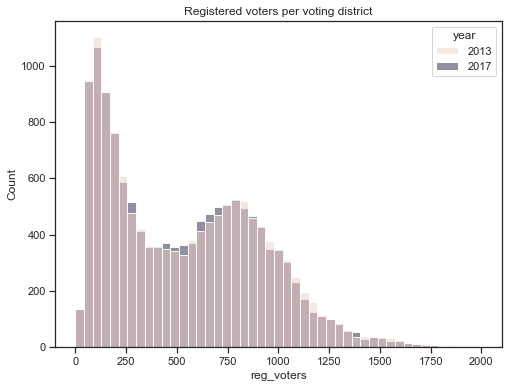

In [68]:
sns.histplot(data=voters_attendance , x='reg_voters', binrange=(0, 2000), hue='year')\
    .set(title='Registered voters per voting district')

Voter attendance seems to have a minor correlation with number of voters in the voting district.

Text(0.5, 0.98, 'Attendance and district size')

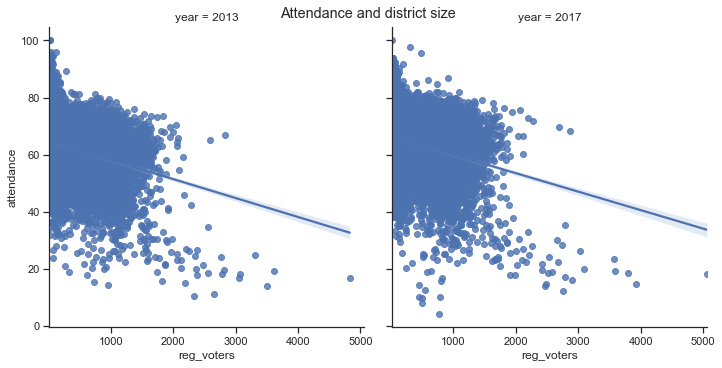

In [69]:
sns.lmplot(data=voters_attendance, x='reg_voters', y='attendance', col='year').fig.suptitle('Attendance and district size')

Attendance follows a normal distribution, as might be expected. It is notable that it increased in 2017.

[Text(0.5, 1.0, 'Voter attendance in districts')]

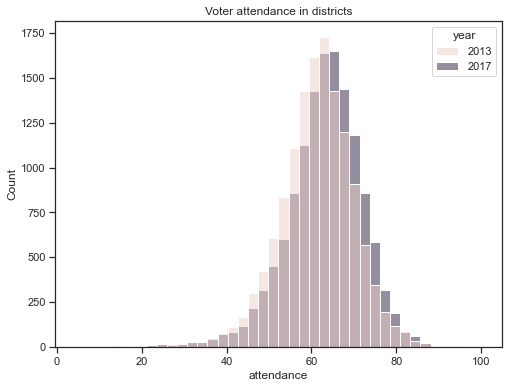

In [70]:
sns.histplot(voters_attendance, x='attendance', bins=40, hue='year').set(title='Voter attendance in districts')

In [71]:
df[['attendance_13', 'attendance_17']].describe()

,attendance_13,attendance_17
count,13540.000000,13540.000000
mean,61.091597,62.949046
std,9.034477,9.254552
min,10.636480,4.409857
25%,56.055706,58.032756
50%,61.617031,63.636364
75%,66.666667,68.876623
max,100.000000,100.000000


### Demographic data
The demographic data provided in the dataset are the following:
- Total population in the district
- Total men
- Total women
- Count of divorced
- Count of children up to 14 yrs
- Count of people 65+ yrs
- Gipsy population
- Count of people with university education (highest)
- Count of people with education level 5
- Count of people with education level 4
- Count of people with education level 3
- Count of people with education level 2
- Count of people with at most grammar school (lowest)
- Count of Roman Catholics
- Count of employed people - unretired
- Count of employed people - retired but working
- Count of unemployed people
- Count of retired not working people


#### Education data

This data shows the maximum reached level of education for the population. The levels are not cummulative

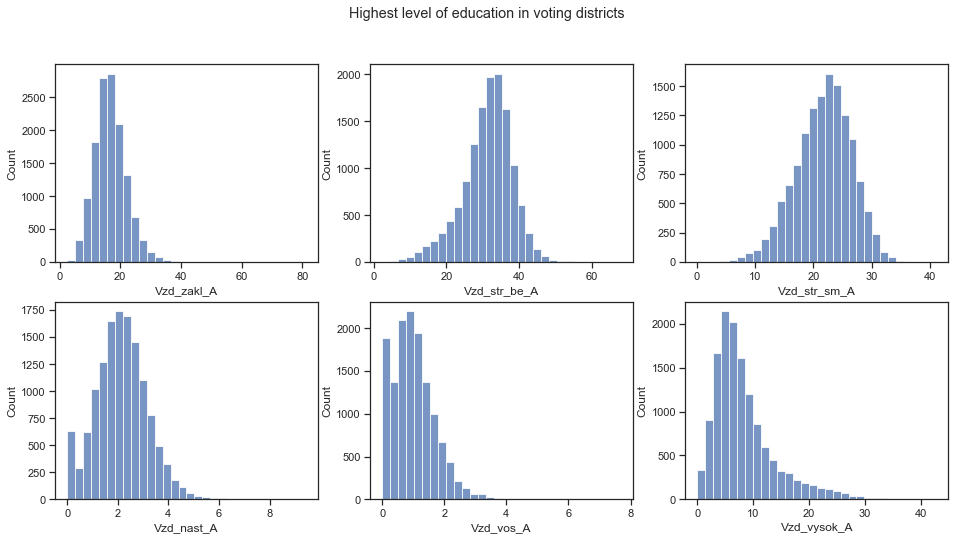

In [72]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(16, 8)
fig.suptitle('Highest level of education in voting districts')
for i, lvl in enumerate(educ_levels_cols):
    sns.histplot(data=df, x=lvl, bins=30, ax=ax[i//3, i%3])

##### Correlation between voter attendance and district education

[Text(0.5, 1.0, 'Correlation of attendance with education')]

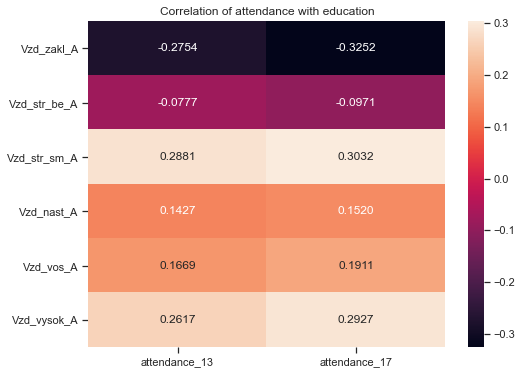

In [73]:
utils.make_heatmap(df, attendances, educ_levels_cols, 'Correlation of attendance with education')

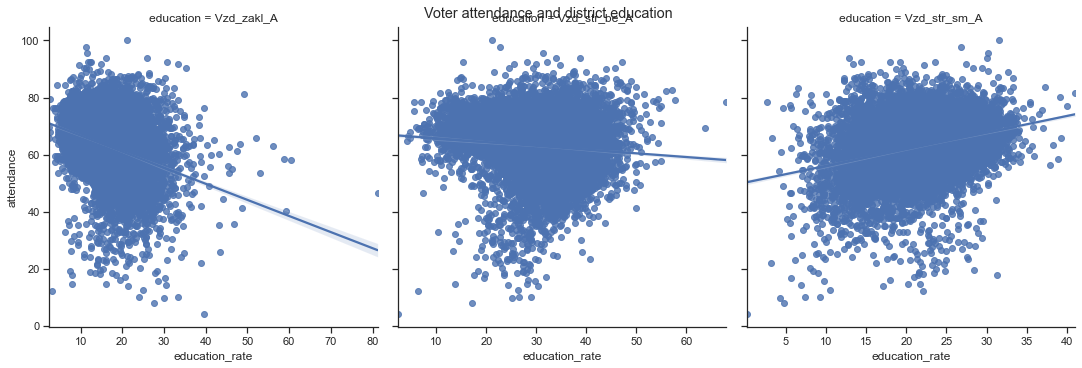

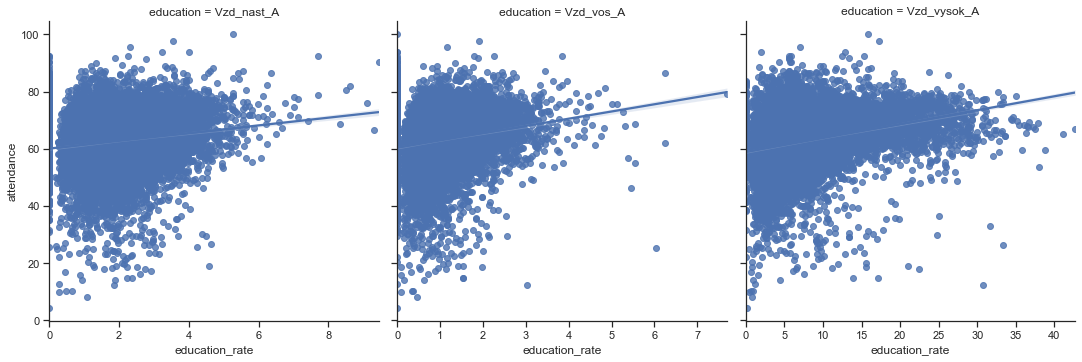

In [74]:
temp_df = utils.init_row_df(['attendance', 'education_rate'], 'education')
for lvl in educ_levels_cols[0:3]:
    temp_df = utils.add_to_row_df(temp_df, df[['attendance_17', lvl]], lvl)
sns.lmplot(data=temp_df, x='education_rate', y='attendance', col='education', sharex=False).fig.suptitle('Voter attendance and district education')

temp_df = utils.init_row_df(['attendance', 'education_rate'], 'education')
for lvl in educ_levels_cols[3:6]:
    temp_df = utils.add_to_row_df(temp_df, df[['attendance_17', lvl]], lvl)
sns.lmplot(data=temp_df, x='education_rate', y='attendance', col='education', sharex=False)

There definitely is a relationship between the education level of a voting district and the voter attendance and it is worthwile to investigate it. From an initial observation, it appears that districts in which a higher percentage of the population have a lower education level tend to vote less and districts with a more eduated population vote more.

### Emplyoment data

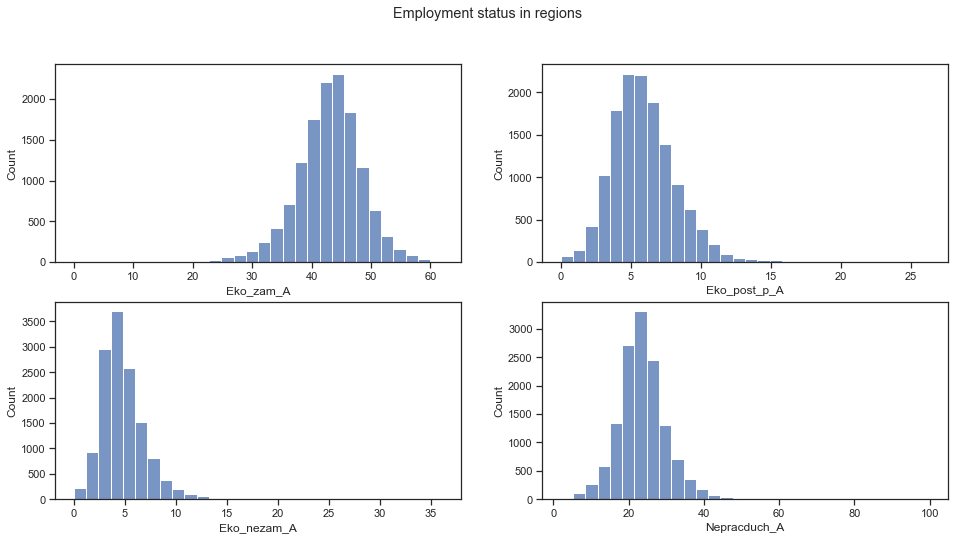

In [75]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16, 8)
fig.suptitle('Employment status in regions')

for i, lvl in enumerate(empl_states_cols):
    sns.histplot(data=df, x=lvl, bins=30, ax=ax[i//2, i%2])

[Text(0.5, 1.0, 'Correlation of attendance with employment')]

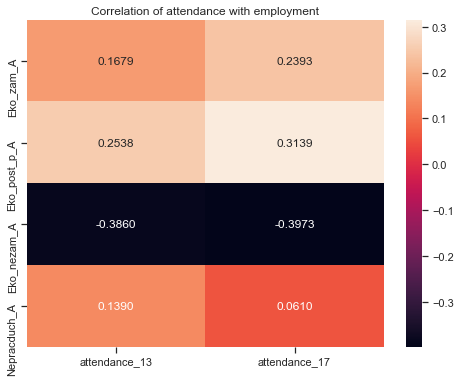

In [76]:
utils.make_heatmap(df, attendances, empl_states_cols, 'Correlation of attendance with employment')

Text(0.5, 0.98, 'Voter attendance and district education')

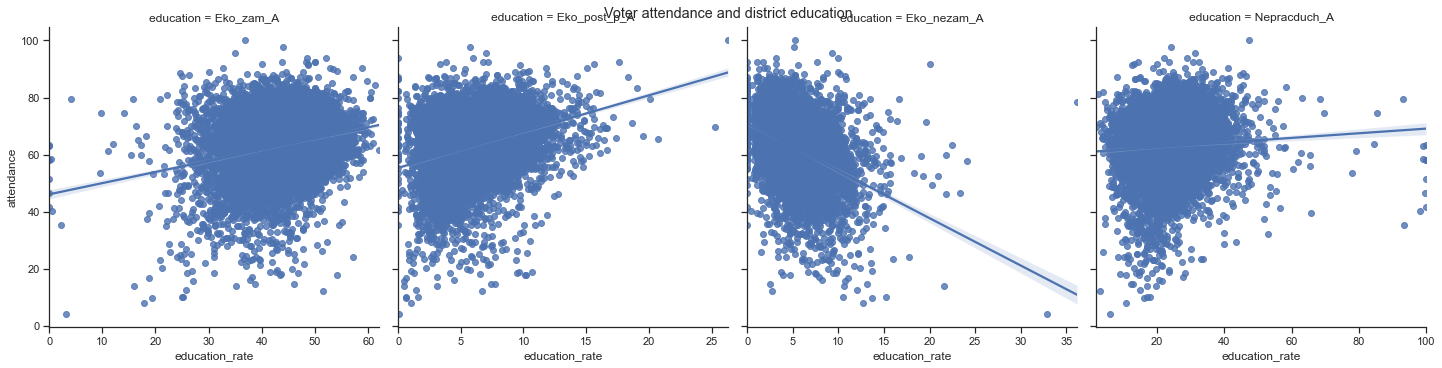

In [77]:
temp_df = utils.make_row_df(df, ['attendance', 'education_rate'], empl_states_cols, 'attendance_17', 'education')

sns.lmplot(data=temp_df, x='education_rate', y='attendance', col='education', sharex=False).fig.suptitle('Voter attendance and district education')

Whilist retirement is not correlated to voter attendance, the employment metric is worth investigating further.

### Age data
The age data available are people under 14 and over 65

[Text(0.5, 1.0, 'Correlation of attendance with ages')]

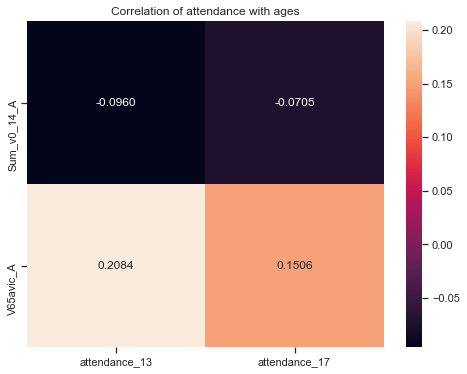

In [78]:
utils.make_heatmap(df, attendances, ['Sum_v0_14_A', 'V65avic_A'], 'Correlation of attendance with ages')

Althugh slightly more relevant than retirement data, the age data does not appear very important.

### Miscelaneous data
The remaining data columns are
- Population share - men
- Population share - women
- Gipsy population
- Population share of Roman Catholics
- Population share of divorced


[Text(0.5, 1.0, 'Correlation of attendance with remaining demographic data')]

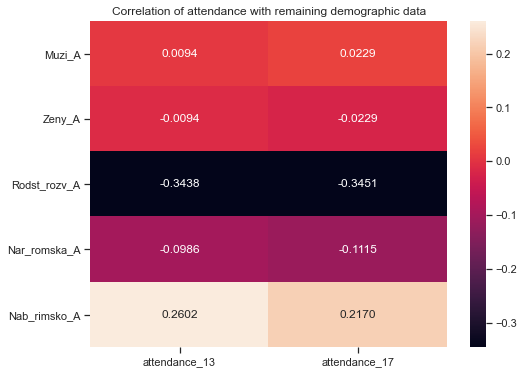

In [79]:
utils.make_heatmap(df, attendances, misc_cols, 'Correlation of attendance with remaining demographic data')

Gender data isn't useful to estimating voter turnout.  Divorce rates and catholics might be worth exploring.

[Text(0.5, 1.0, 'Correlation of attendances and demographic data')]

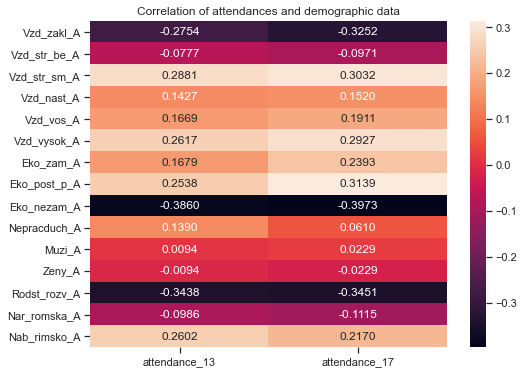

In [80]:
utils.make_heatmap(df, attendances, demographics_cols, 'Correlation of attendances and demographic data')

In [81]:
df[attendances + demographics_cols].describe().swapaxes(0, 1)

,count,mean,std,min,25%,50%,75%,max
attendance_13,13540.0,61.091597,9.034477,10.636480,56.055706,61.617031,66.666667,100.000000
attendance_17,13540.0,62.949046,9.254552,4.409857,58.032756,63.636364,68.876623,100.000000
Vzd_zakl_A,13540.0,16.716349,5.338931,2.471483,13.209187,16.279070,19.777144,81.180812
Vzd_str_be_A,13540.0,31.253283,6.863606,2.321429,27.518550,31.986420,35.702109,68.000000
Vzd_str_sm_A,13540.0,21.749741,4.832549,0.089286,18.649400,22.079734,25.132275,41.071429
Vzd_nast_A,13540.0,2.135877,1.041009,0.000000,1.461988,2.112895,2.777778,9.433962
Vzd_vos_A,13540.0,1.000544,0.701236,0.000000,0.529101,0.928923,1.388889,7.692308
Vzd_vysok_A,13540.0,8.321107,5.569299,0.000000,4.608295,6.881070,10.344828,42.717770
Eko_zam_A,13540.0,42.930708,5.660179,0.000000,39.857116,43.254413,46.425990,62.034514
Eko_post_p_A,13540.0,5.932302,2.290046,0.000000,4.356989,5.688676,7.236842,26.315789


<AxesSubplot:>

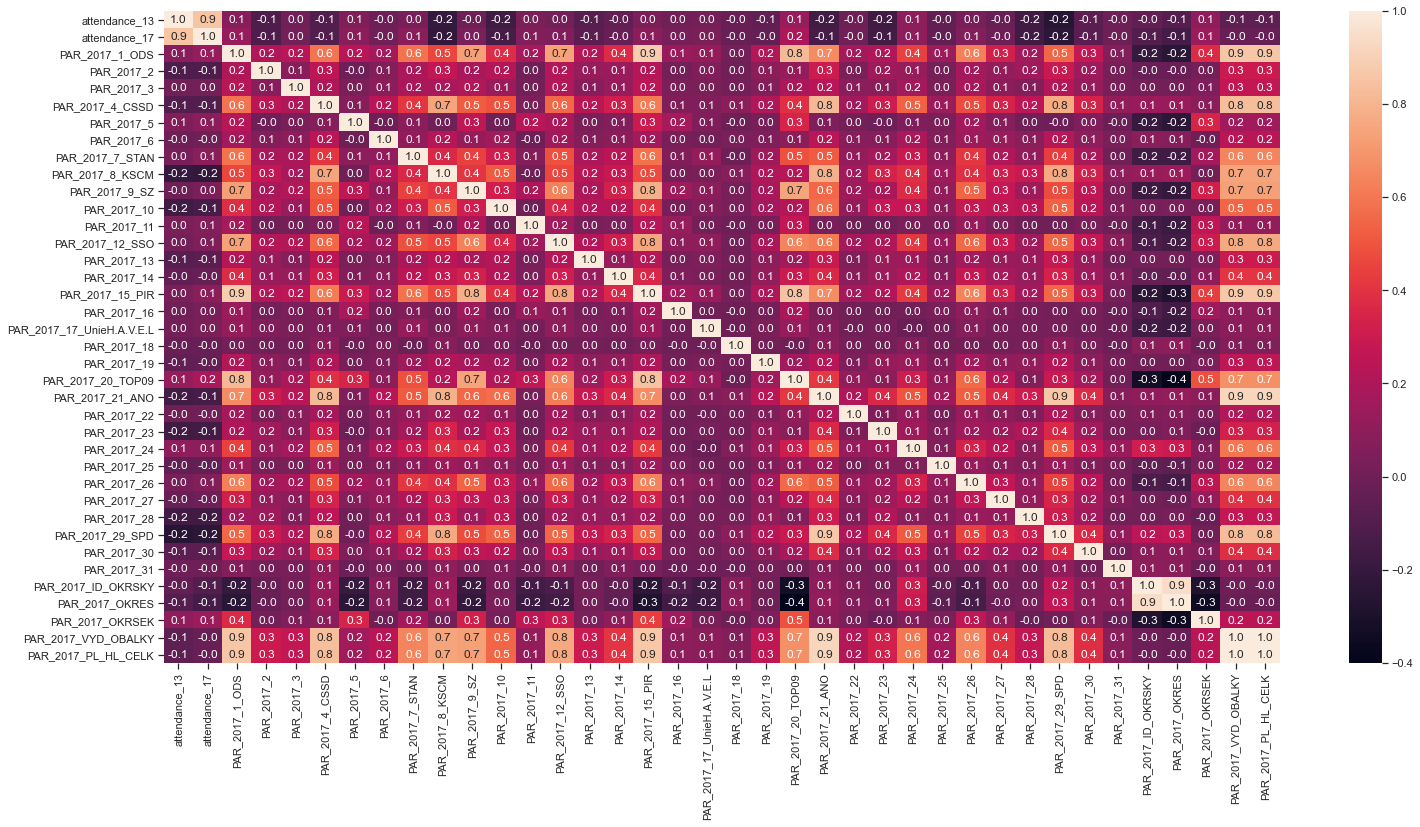

In [82]:
parties_cols = [col for col in df.columns if col.startswith('PAR_2017_')]

heatmap_cols = attendances + parties_cols
plt.figure(figsize=(25,12))
cr = df[heatmap_cols].corr()
sns.heatmap(data=cr, annot=True, fmt='.1f')